# Stock market API Project
Alpha Vantage API - https://rapidapi.com/alphavantage/api/alpha-vantage

# Search endpoint to find out the company symbol
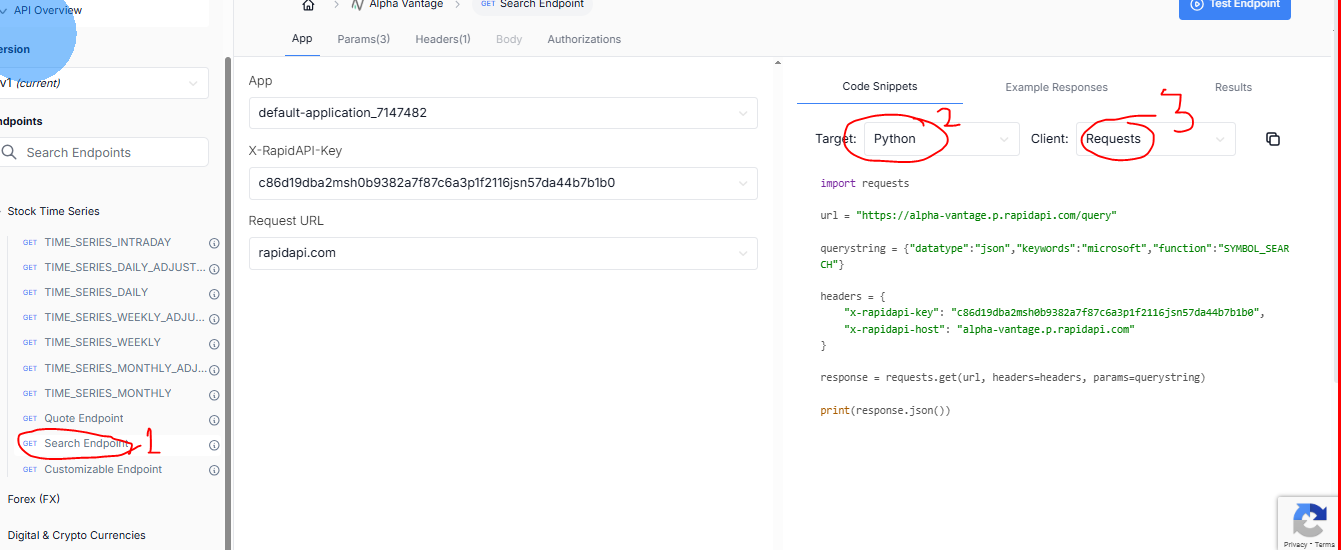

# Load the API Key

In [2]:
import streamlit as st
api_key = st.secrets["API_KEY"]

# Search endpoint

In [4]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

company = "State Bank of India"

querystring = {"datatype":"json","keywords":company,"function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": st.secrets["API_KEY"],
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [7]:
import pandas as pd
symbols = pd.DataFrame(data["bestMatches"])
symbols

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


In [8]:
symbols.to_csv("SBIsymbols.csv", index=False)

# Daily data for SBIN.BSE
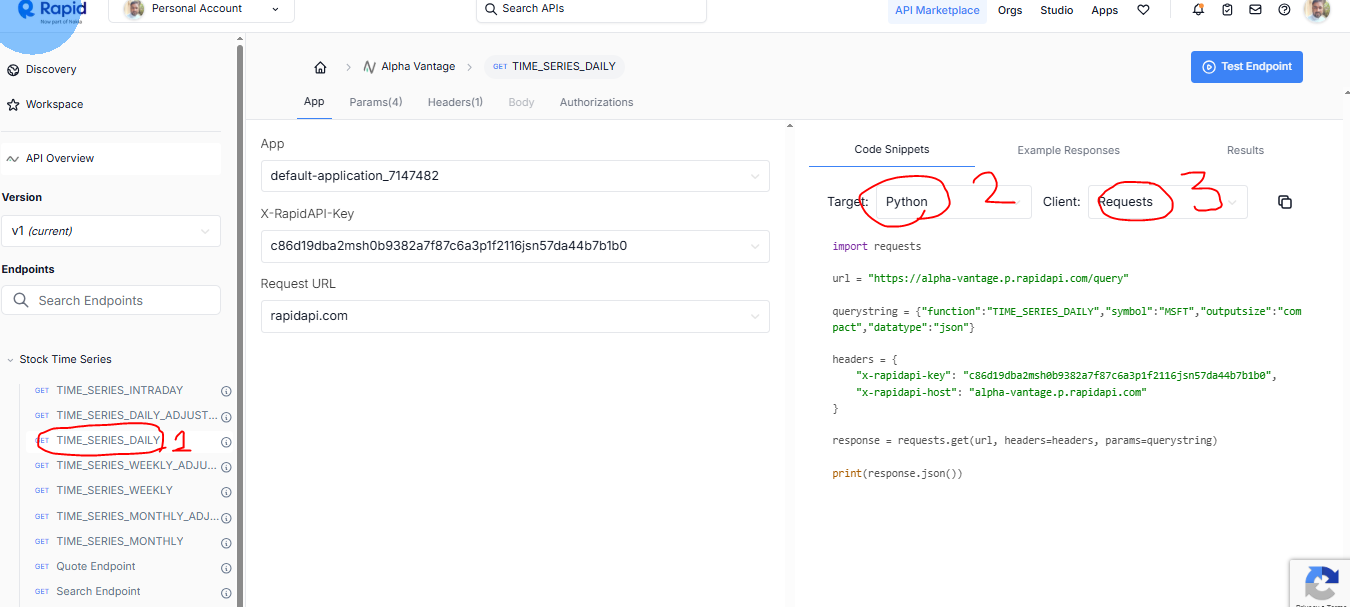

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

symbol = "SBIN.BSE"

querystring = {"function":"TIME_SERIES_DAILY","symbol":symbol,"outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": st.secrets["API_KEY"],
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-11-07',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-11-07': {'1. open': '959.9500',
   '2. high': '964.5000',
   '3. low': '944.0000',
   '4. close': '955.9500',
   '5. volume': '582333'},
  '2025-11-06': {'1. open': '966.3500',
   '2. high': '971.1500',
   '3. low': '955.3000',
   '4. close': '960.7500',
   '5. volume': '1731058'},
  '2025-11-04': {'1. open': '952.2500',
   '2. high': '959.0000',
   '3. low': '941.3500',
   '4. close': '957.0500',
   '5. volume': '948033'},
  '2025-11-03': {'1. open': '938.5000',
   '2. high': '953.1500',
   '3. low': '937.8000',
   '4. close': '950.2500',
   '5. volume': '696733'},
  '2025-10-31': {'1. open': '935.8000',
   '2. high': '946.7000',
   '3. low': '930.2500',
   '4. close': '937.0000',
   '5. volume': '780748'},
  '2025-10-30': {'1. open': '940.0000

In [12]:
stock_df = pd.DataFrame(data["Time Series (Daily)"]).T
stock_df

,1. open,2. high,3. low,4. close,5. volume
2025-11-07,959.9500,964.5000,944.0000,955.9500,582333
2025-11-06,966.3500,971.1500,955.3000,960.7500,1731058
2025-11-04,952.2500,959.0000,941.3500,957.0500,948033
2025-11-03,938.5000,953.1500,937.8000,950.2500,696733
2025-10-31,935.8000,946.7000,930.2500,937.0000,780748
...,...,...,...,...,...
2025-06-19,792.8500,793.2000,781.5000,784.7000,235832
2025-06-18,792.1000,795.5000,788.3500,791.7500,131579
2025-06-17,793.5000,798.8000,790.7500,792.2000,1103108
2025-06-16,792.5500,795.3500,786.3500,792.8500,1385709


In [13]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-11-07 to 2025-06-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [14]:
# Convert into float datatype
stock_df = stock_df.astype(float)
stock_df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [15]:
stock_df.index

Index(['2025-11-07', '2025-11-06', '2025-11-04', '2025-11-03', '2025-10-31',
       '2025-10-30', '2025-10-29', '2025-10-28', '2025-10-27', '2025-10-24',
       '2025-10-23', '2025-10-20', '2025-10-17', '2025-10-16', '2025-10-15',
       '2025-10-14', '2025-10-13', '2025-10-10', '2025-10-09', '2025-10-08',
       '2025-10-07', '2025-10-06', '2025-10-03', '2025-10-01', '2025-09-30',
       '2025-09-29', '2025-09-26', '2025-09-25', '2025-09-24', '2025-09-23',
       '2025-09-22', '2025-09-19', '2025-09-18', '2025-09-17', '2025-09-16',
       '2025-09-15', '2025-09-12', '2025-09-11', '2025-09-10', '2025-09-09',
       '2025-09-08', '2025-09-05', '2025-09-04', '2025-09-03', '2025-09-02',
       '2025-09-01', '2025-08-29', '2025-08-28', '2025-08-26', '2025-08-25',
       '2025-08-22', '2025-08-21', '2025-08-20', '2025-08-19', '2025-08-18',
       '2025-08-14', '2025-08-13', '2025-08-12', '2025-08-11', '2025-08-08',
       '2025-08-07', '2025-08-06', '2025-08-05', '2025-08-04', '2025-08-01',

In [16]:
stock_df.index = pd.to_datetime(stock_df.index)
stock_df.index

DatetimeIndex(['2025-11-07', '2025-11-06', '2025-11-04', '2025-11-03',
               '2025-10-31', '2025-10-30', '2025-10-29', '2025-10-28',
               '2025-10-27', '2025-10-24', '2025-10-23', '2025-10-20',
               '2025-10-17', '2025-10-16', '2025-10-15', '2025-10-14',
               '2025-10-13', '2025-10-10', '2025-10-09', '2025-10-08',
               '2025-10-07', '2025-10-06', '2025-10-03', '2025-10-01',
               '2025-09-30', '2025-09-29', '2025-09-26', '2025-09-25',
               '2025-09-24', '2025-09-23', '2025-09-22', '2025-09-19',
               '2025-09-18', '2025-09-17', '2025-09-16', '2025-09-15',
               '2025-09-12', '2025-09-11', '2025-09-10', '2025-09-09',
               '2025-09-08', '2025-09-05', '2025-09-04', '2025-09-03',
               '2025-09-02', '2025-09-01', '2025-08-29', '2025-08-28',
               '2025-08-26', '2025-08-25', '2025-08-22', '2025-08-21',
               '2025-08-20', '2025-08-19', '2025-08-18', '2025-08-14',
      

In [17]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2025-11-07 to 2025-06-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [18]:
stock_df

,1. open,2. high,3. low,4. close,5. volume
2025-11-07,959.95,964.50,944.00,955.95,582333.0
2025-11-06,966.35,971.15,955.30,960.75,1731058.0
2025-11-04,952.25,959.00,941.35,957.05,948033.0
2025-11-03,938.50,953.15,937.80,950.25,696733.0
2025-10-31,935.80,946.70,930.25,937.00,780748.0
...,...,...,...,...,...
2025-06-19,792.85,793.20,781.50,784.70,235832.0
2025-06-18,792.10,795.50,788.35,791.75,131579.0
2025-06-17,793.50,798.80,790.75,792.20,1103108.0
2025-06-16,792.55,795.35,786.35,792.85,1385709.0


In [19]:
stock_df.to_csv("SBIN.csv", index=False)

# Visualize above using plotly chart

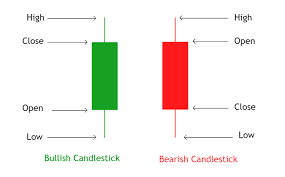

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data = [
    go.Candlestick(
        x = stock_df.index,
        open = stock_df["1. open"],
        high = stock_df["2. high"],
        low = stock_df["3. low"],
        close = stock_df["4. close"]
    )
])

fig.update_layout(
    height = 800,
    width = 1200
)
fig.show()

# Build a Class to fetch any stock market data

In [23]:
import streamlit as st
import requests
import pandas as pd
import plotly.graph_objects as go

class StockAPI:

    def __init__(self):
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": st.secrets["API_KEY"],
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }

    def get_symbols(self, company: str) -> pd.DataFrame:
        querystring = {"datatype":"json","keywords":company,"function":"SYMBOL_SEARCH"}
        response = requests.get(self.url, headers=self.headers, params=querystring)
        response.raise_for_status()
        data = response.json()
        search_df = pd.DataFrame(data["bestMatches"])
        return search_df
    
    def get_daily_prices(self, symbol: str) -> pd.DataFrame:
        querystring = {"function":"TIME_SERIES_DAILY","symbol":symbol,"outputsize":"compact","datatype":"json"}
        response = requests.get(url = self.url, headers=self.headers, params=querystring)
        response.raise_for_status()
        data = response.json()
        price_df = pd.DataFrame(data["Time Series (Daily)"]).T
        price_df = price_df.astype(float)
        price_df.index = pd.to_datetime(price_df.index)
        return price_df
    
    def plot_candlestick(self, stock_df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(data = [
            go.Candlestick(
                x = stock_df.index,
                open = stock_df["1. open"],
                high = stock_df["2. high"],
                low = stock_df["3. low"],
                close = stock_df["4. close"]
            )
        ])

        fig.update_layout(
            height = 800,
            width = 1200
        )
        return fig
        

In [24]:
client = StockAPI()

In [25]:
client.get_symbols(company = "HDFC bank")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [26]:
hdfc_prices = client.get_daily_prices(symbol="HDFCBANK.BSE")
hdfc_prices

,1. open,2. high,3. low,4. close,5. volume
2025-11-07,984.30,984.80,974.55,982.90,611248.0
2025-11-06,983.90,991.00,974.20,984.50,1294375.0
2025-11-04,989.75,996.70,983.65,985.10,597421.0
2025-11-03,985.50,994.65,983.20,992.50,754198.0
2025-10-31,994.90,1004.35,982.20,987.65,944173.0
...,...,...,...,...,...
2025-06-19,1930.25,1946.00,1927.00,1934.80,305440.0
2025-06-18,1921.90,1935.70,1918.50,1933.90,390764.0
2025-06-17,1941.95,1941.95,1919.55,1929.60,2412340.0
2025-06-16,1920.05,1938.75,1920.05,1935.05,613800.0


In [27]:
fig = client.plot_candlestick(hdfc_prices)
fig.show()

In [28]:
client.get_symbols("Godrej")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,GODREJCP.BSE,GODREJ CONSUMER PRODUCTS LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.7059
1,GODREJIND.BSE,GODREJ INDUSTRIES LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6667
2,GODREJAGRO.BSE,Godrej Agrovet Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
3,GODREJPROP.BSE,Godrej Properties Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
4,540743.BSE,Godrej Agrovet Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4286
5,532424.BSE,Godrej Consumer Products Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3158


In [29]:
godrej_prices = client.get_daily_prices("GODREJIND.BSE")
godrej_prices

,1. open,2. high,3. low,4. close,5. volume
2025-11-07,1082.00,1082.00,1056.35,1075.70,4493.0
2025-11-06,1101.60,1106.65,1082.00,1085.10,1997.0
2025-11-05,1106.35,1106.35,1106.35,1106.35,0.0
2025-11-04,1128.90,1130.20,1103.35,1106.35,6515.0
2025-11-03,1084.75,1133.85,1084.75,1128.90,2239.0
...,...,...,...,...,...
2025-06-25,1258.75,1267.90,1234.45,1248.30,5716.0
2025-06-24,1292.00,1298.00,1245.40,1253.30,16207.0
2025-06-23,1315.70,1358.15,1277.00,1282.60,13318.0
2025-06-20,1335.00,1378.20,1324.25,1348.45,14195.0


In [32]:
godrej_prices.to_csv("godrejind.csv")

In [30]:
fig = client.plot_candlestick(godrej_prices)
fig.show()